In [1]:
# Imports
import os
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as sci
import matplotlib.pyplot as plt

In [4]:
# Data set
sentences = ['KatGevoerd', 'Doelpunt', 'GeenHonger']
emotions = ['Neutraal', 'Blij', 'Boos', 'Verrast', 'Verdrietig', 'Enthousiast', 'Skeptisch']

path = 'livelink_data/20220523_'
filename = sentences[0] + '_' + emotions[0]

for file in os.listdir(path+filename):
    if file.endswith('raw.csv'):
        data = os.path.join(path+filename, file)
        df_raw = pd.read_csv(data)
        
# for file in os.listdir(path+filename):
#     if file.endswith('cal.csv'):
#         data = os.path.join(path+filename, file)
#         df_cal = pd.read_csv(data)
        
print(df_raw.columns)
mouth_group = ['MouthClose', 'MouthFunnel', 'MouthPucker', 'MouthRight', 'MouthLeft', 'MouthSmileLeft', 'MouthSmileRight', 
         'MouthFrownLeft', 'MouthFrownRight', 'MouthDimpleLeft', 'MouthDimpleRight', 'MouthStretchLeft', 
         'MouthStretchRight', 'MouthRollLower', 'MouthRollUpper', 'MouthShrugLower', 'MouthShrugUpper',
         'MouthPressLeft', 'MouthPressRight', 'MouthLowerDownLeft','MouthLowerDownRight', 'MouthUpperUpLeft', 
         'MouthUpperUpRight']

brow_group = ['BrowDownLeft', 'BrowDownRight', 'BrowInnerUp', 'BrowOuterUpLeft', 'BrowOuterUpRight']
# print(df['EyeBlinkRight'])

def get_dataset(sentence, emotion):
    path = 'livelink_data/20220523_'
    filename = sentence + '_' + emotion

    for file in os.listdir(path+filename):
        if file.endswith('raw.csv'):
            data = os.path.join(path+filename, file)
            df = pd.read_csv(data)
    return df

cat_neutral = get_dataset('KatGevoerd', 'Neutraal')
# cat_surprised = get_dataset('KatGevoerd', 'Verrast') # Not labeled yet
cat_happy = get_dataset('KatGevoerd', 'Blij')
cat_mad = get_dataset('KatGevoerd', 'Boos')
cat_sceptical = get_dataset('KatGevoerd', 'Skeptisch')

Index(['Timecode', 'BlendShapeCount', 'EyeBlinkLeft', 'EyeLookDownLeft',
       'EyeLookInLeft', 'EyeLookOutLeft', 'EyeLookUpLeft', 'EyeSquintLeft',
       'EyeWideLeft', 'EyeBlinkRight', 'EyeLookDownRight', 'EyeLookInRight',
       'EyeLookOutRight', 'EyeLookUpRight', 'EyeSquintRight', 'EyeWideRight',
       'JawForward', 'JawRight', 'JawLeft', 'JawOpen', 'MouthClose',
       'MouthFunnel', 'MouthPucker', 'MouthRight', 'MouthLeft',
       'MouthSmileLeft', 'MouthSmileRight', 'MouthFrownLeft',
       'MouthFrownRight', 'MouthDimpleLeft', 'MouthDimpleRight',
       'MouthStretchLeft', 'MouthStretchRight', 'MouthRollLower',
       'MouthRollUpper', 'MouthShrugLower', 'MouthShrugUpper',
       'MouthPressLeft', 'MouthPressRight', 'MouthLowerDownLeft',
       'MouthLowerDownRight', 'MouthUpperUpLeft', 'MouthUpperUpRight',
       'BrowDownLeft', 'BrowDownRight', 'BrowInnerUp', 'BrowOuterUpLeft',
       'BrowOuterUpRight', 'CheekPuff', 'CheekSquintLeft', 'CheekSquintRight',
       'NoseSneer

In [8]:
print(df_raw[mouth_group].describe())
# print(df_cal[mouth_group].describe())
print(df_raw[0:10])

       MouthClose  MouthFunnel  MouthPucker  MouthRight   MouthLeft  \
count  249.000000   249.000000   249.000000       249.0  249.000000   
mean     0.076198     0.119719     0.082266         0.0    0.025811   
std      0.040008     0.120159     0.064087         0.0    0.002308   
min      0.041241     0.031760     0.046575         0.0    0.022310   
25%      0.041656     0.033162     0.048539         0.0    0.024367   
50%      0.053461     0.037118     0.055941         0.0    0.025500   
75%      0.107318     0.217484     0.089558         0.0    0.026281   
max      0.177749     0.493212     0.399653         0.0    0.033680   

       MouthSmileLeft  MouthSmileRight  MouthFrownLeft  MouthFrownRight  \
count      249.000000       249.000000      249.000000       249.000000   
mean         0.016931         0.027112        0.033950         0.026438   
std          0.023299         0.032070        0.039114         0.034254   
min          0.000000         0.000000        0.000000      

In [34]:
emotions = ['neutral', 'happy', 'mad', 'surprised', 'sceptical']
cat_labels = ['wat', 'heb', 'jij', 'de kat', 'gevoerd']
cat_frames = {
    'neutral': [105, 138, 160, 172, 178, 218],
    'happy': [76, 100, 110, 120, 138, 176],
    'mad': [64, 86, 95, 105, 120, 159],
    'surprised': None,
    'sceptical': [69, 86, 95, 108, 128, 168]   
}

def split_sentence(dataset, frames, labels):
    split = {}
    for i in range(len(labels)):
        i1, i2 = frames[i], frames[i+1]
        split[labels[i]] = dataset[i1:i2]
    return split

cat_set = {}
for emo in emotions:
    if cat_frames[emo]:
        cat_set[emo] = split_sentence(cat_neutral, cat_frames[emo], cat_labels)
        
cat_neutral_split = split_sentence(cat_neutral, cat_frames['neutral'], cat_labels)
cat_happy_split = split_sentence(cat_happy, cat_frames['happy'], cat_labels)
cat_mad_split = split_sentence(cat_mad, cat_frames['mad'], cat_labels)
# cat_surprised_split = split_sentence(cat_surprised, cat_frames['surprised'], cat_labels)
cat_sceptical_split = split_sentence(cat_sceptical, cat_frames['sceptical'], cat_labels)

def export_split(split_dict, name, emotion):
    for word in split_dict.keys():
        file = name + '_' + emotion + '_' + word + '.csv'
        out = os.path.join('output', file)
        split_dict[word].to_csv(out)
    
export_split(cat_neutral_split, 'KatGevoerd', 'Neutraal')
export_split(cat_happy_split, 'KatGevoerd', 'Blij')
export_split(cat_mad_split, 'KatGevoerd', 'Boos')
# export_split(cat_surprised_split, 'KatGevoerd', 'Verrast')
export_split(cat_sceptical_split, 'KatGevoerd', 'Skeptisch')

False


count    249.000000
mean       0.119719
std        0.120159
min        0.031760
25%        0.033162
50%        0.037118
75%        0.217484
max        0.493212
Name: MouthFunnel, dtype: float64
[0.054099999999999995, 0.239, 0.10095, 0.2855, 0.14700000000000002, 0.378, 0.33199999999999996, 0.193, 0.47, 0.42400000000000004]
(0.0303, 0.0779]    149
(0.216, 0.262]       26
(0.0779, 0.124]      15
(0.262, 0.309]       14
(0.124, 0.17]        11
(0.355, 0.401]       10
(0.309, 0.355]       10
(0.17, 0.216]         9
(0.447, 0.493]        4
(0.401, 0.447]        1
Name: MouthFunnel, dtype: int64


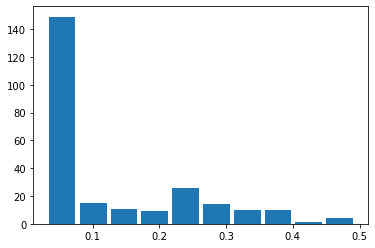

In [57]:
mf_bar = df_raw['MouthFunnel'].value_counts(bins=10)
print(df_raw['MouthFunnel'].describe())

bin_values = [x.mid for x in mf_bar.index]
print(bin_values)
print(mf_bar)
plt.bar(bin_values, mf_bar, width = 0.04)
plt.show()

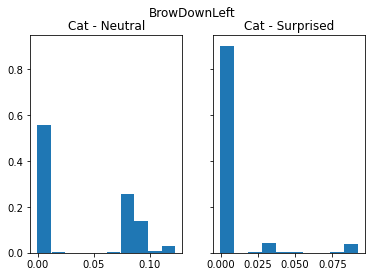

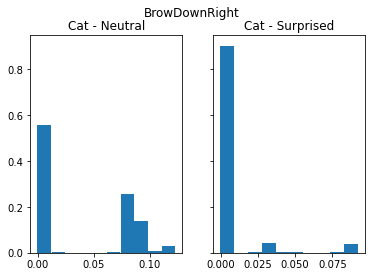

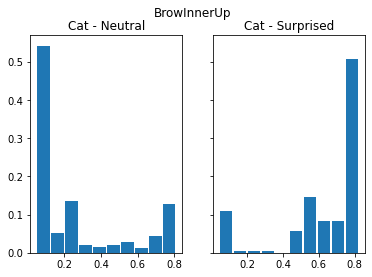

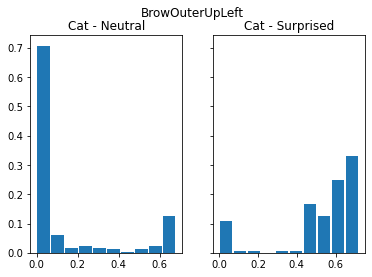

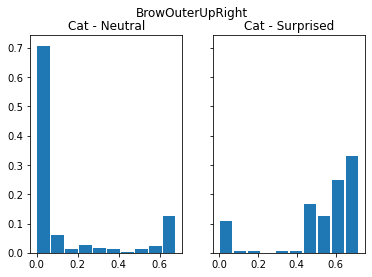

In [75]:
for feat in brow_group:
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    bar_neutral = cat_neutral[feat].value_counts(bins=10, normalize=True)
    bar_surprised = cat_surprised[feat].value_counts(bins=10, normalize=True)
    
    bin_neutral = [f.mid for f in bar_neutral.index]
    bin_surprised = [f.mid for f in bar_surprised.index]
    
    width_neutral = bar_neutral.index[0].length * 0.9
    width_surprised = bar_surprised.index[0].length * 0.9
    
    ax1.bar(bin_neutral, bar_neutral, width=width_neutral)
    ax2.bar(bin_surprised, bar_surprised, width=width_surprised)
    
    ax1.set_title('Cat - Neutral')
    ax2.set_title('Cat - Surprised')
    fig.suptitle(feat)
    plt.show()

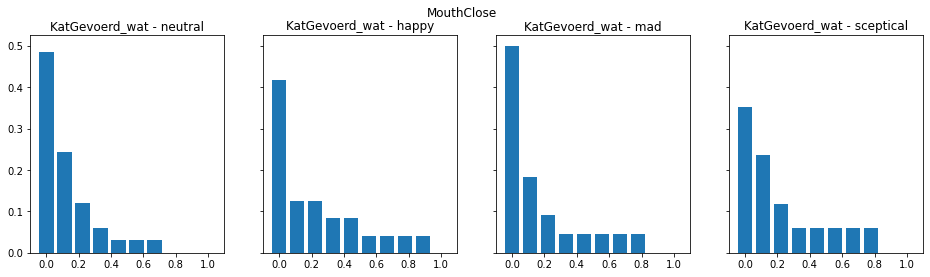

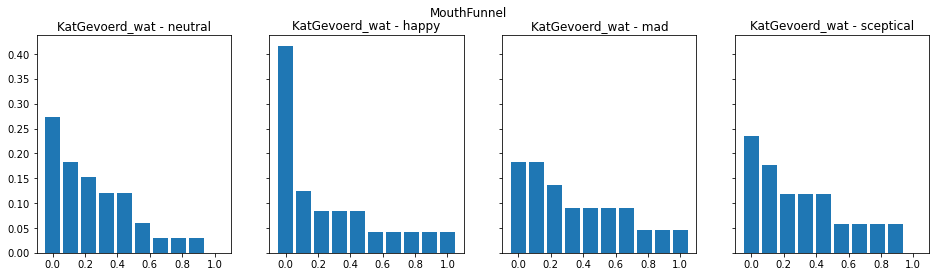

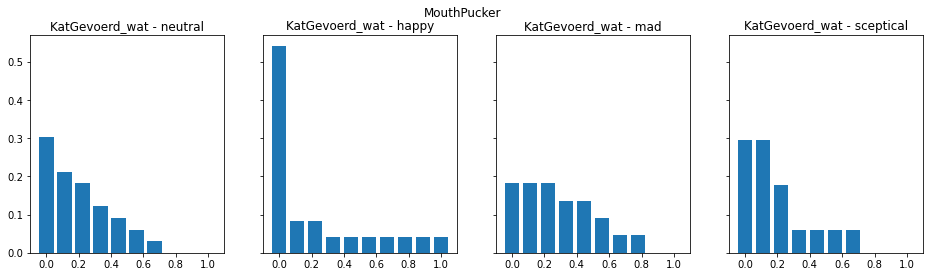

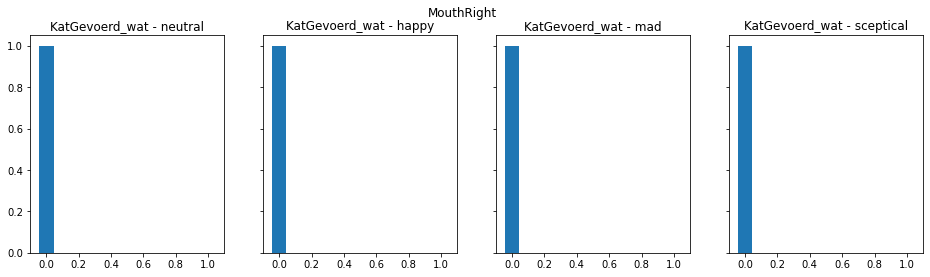

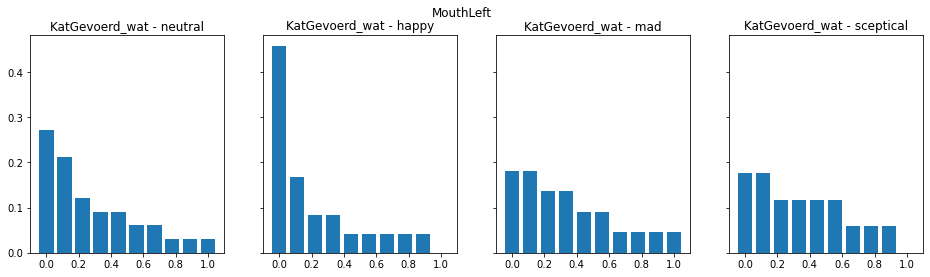

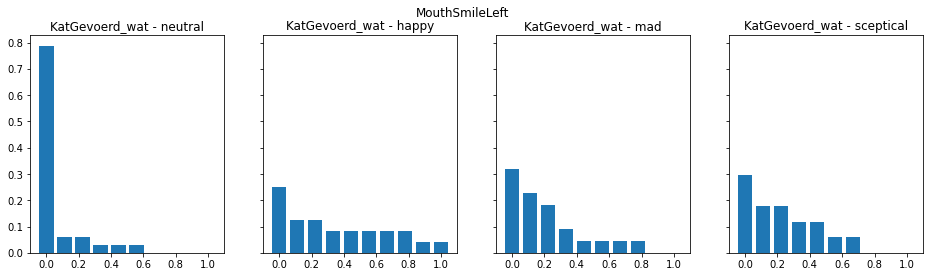

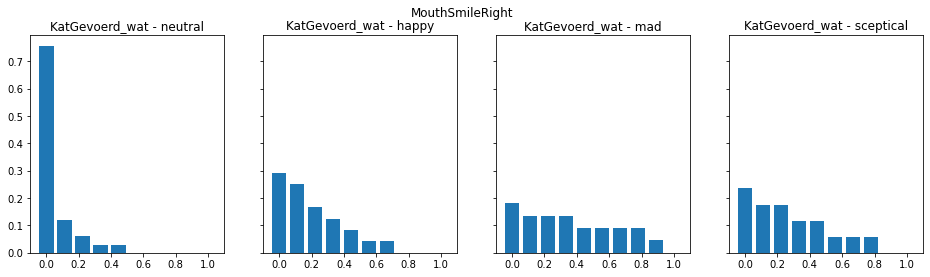

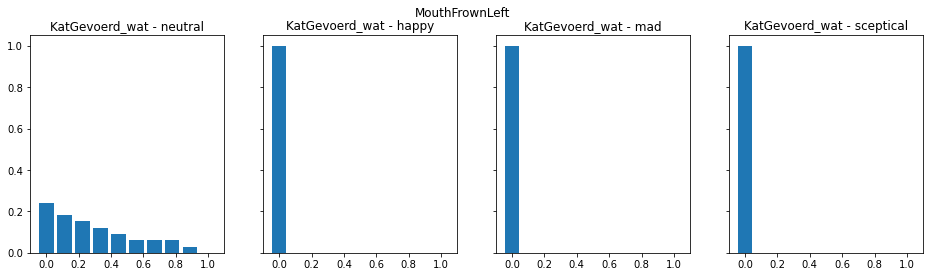

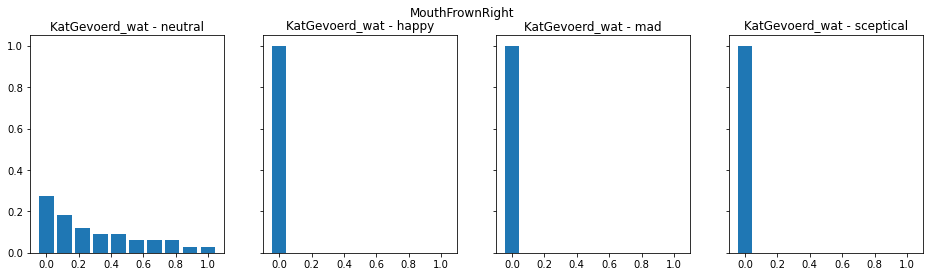

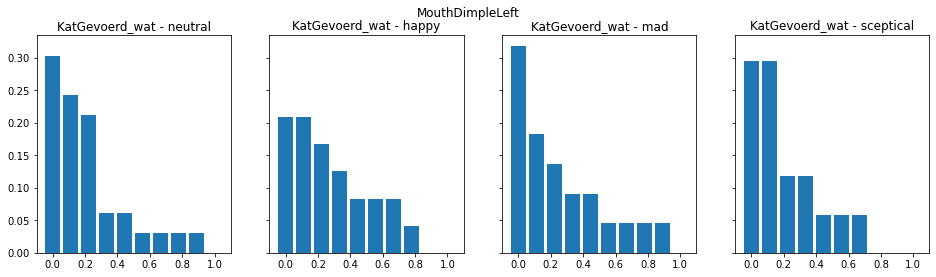

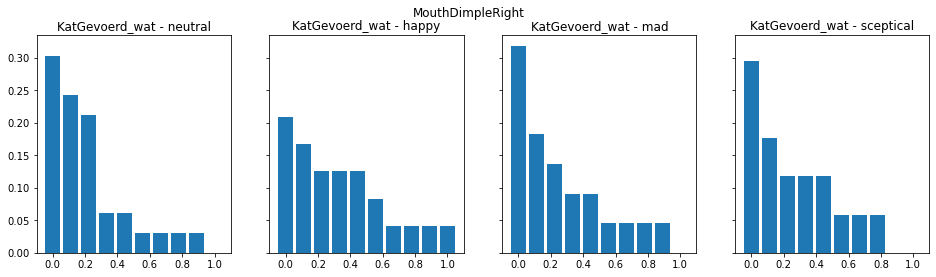

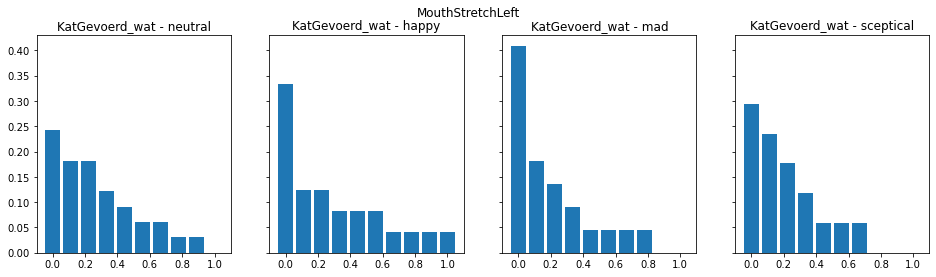

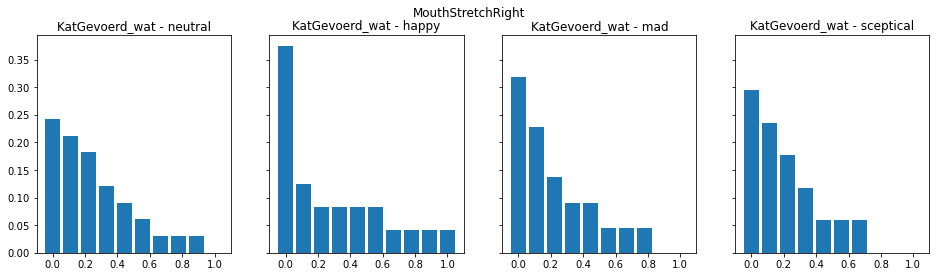

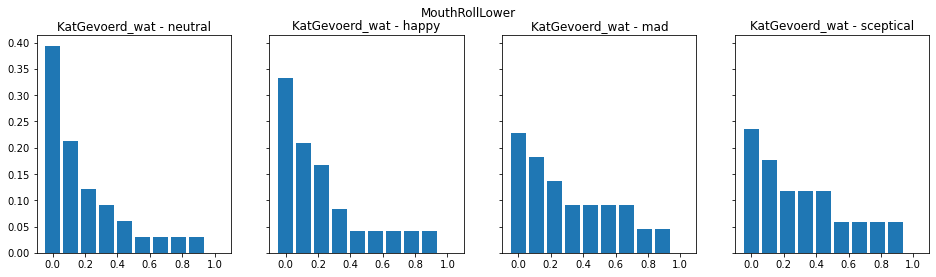

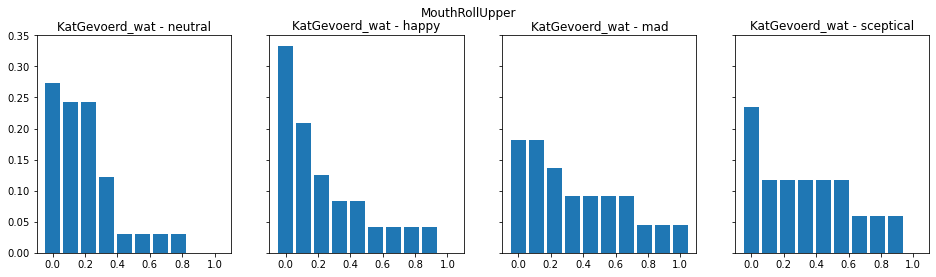

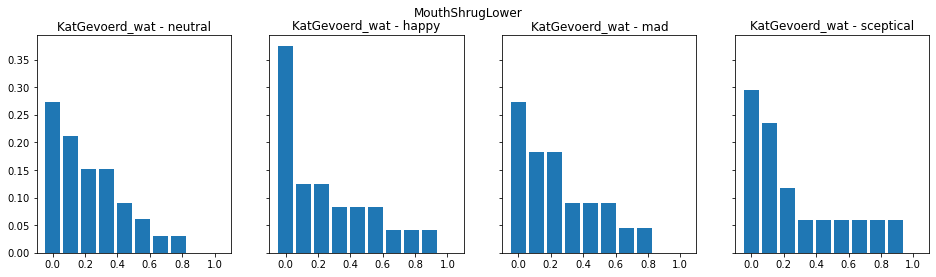

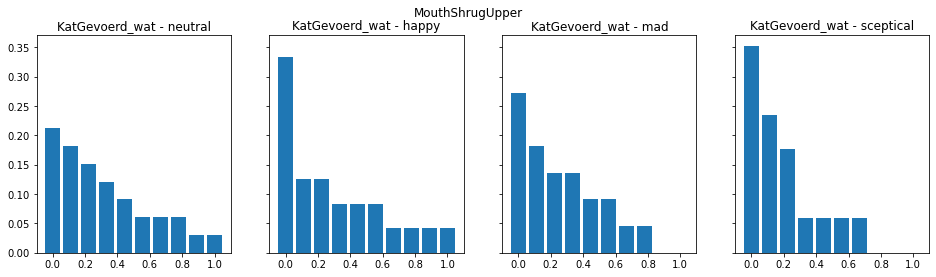

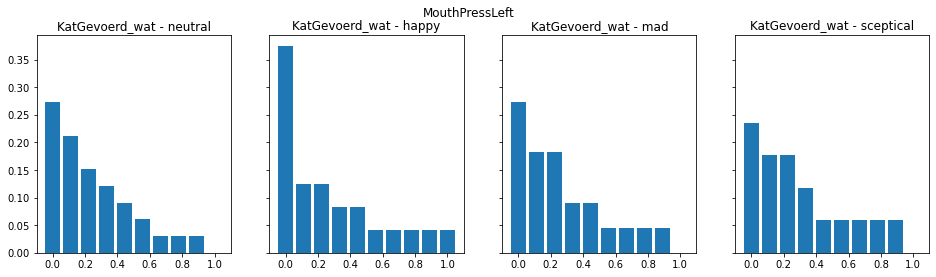

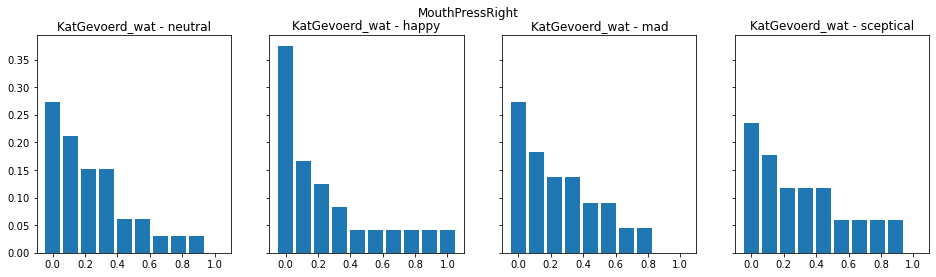

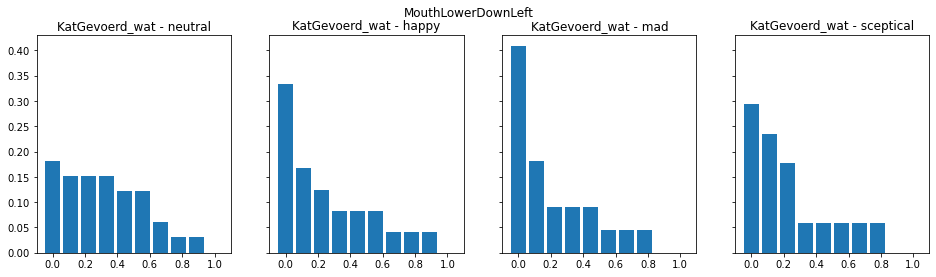

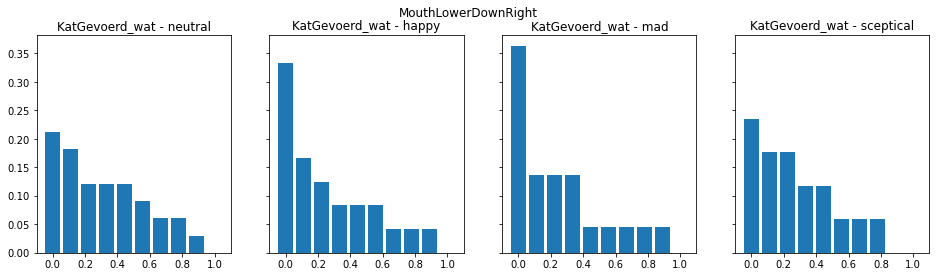

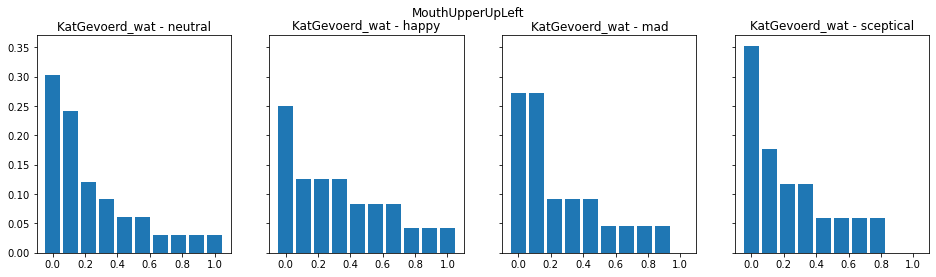

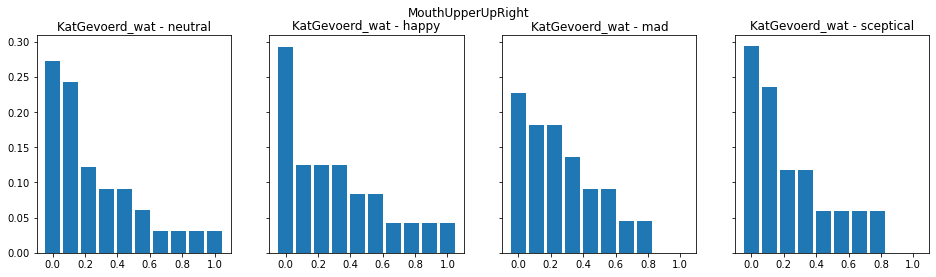

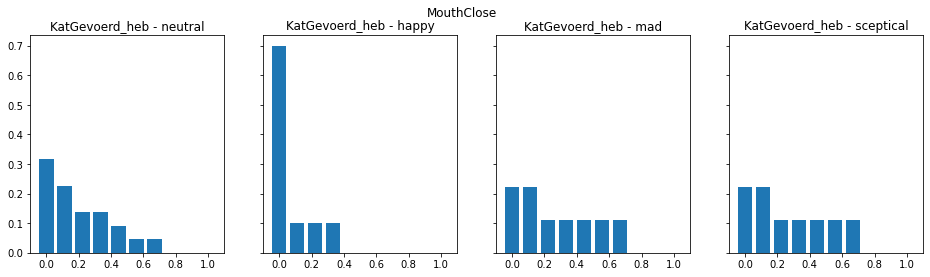

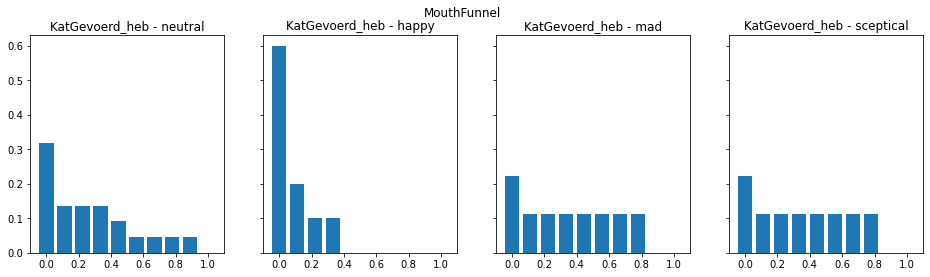

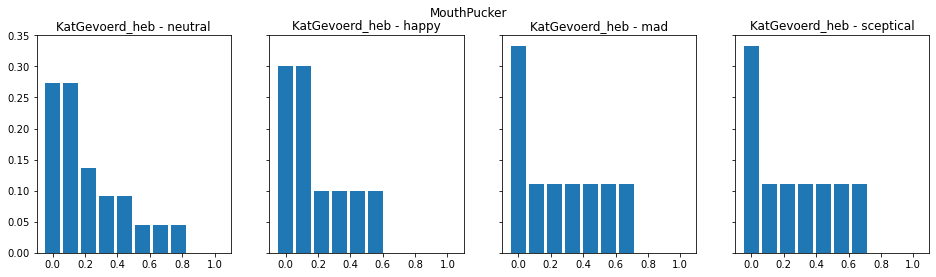

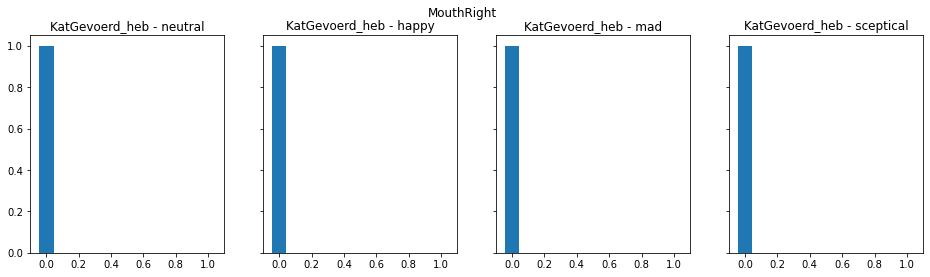

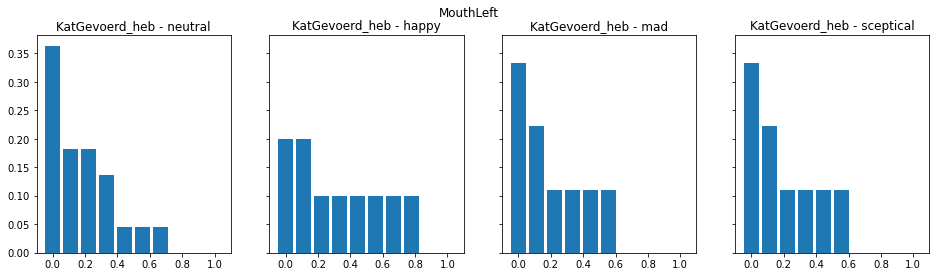

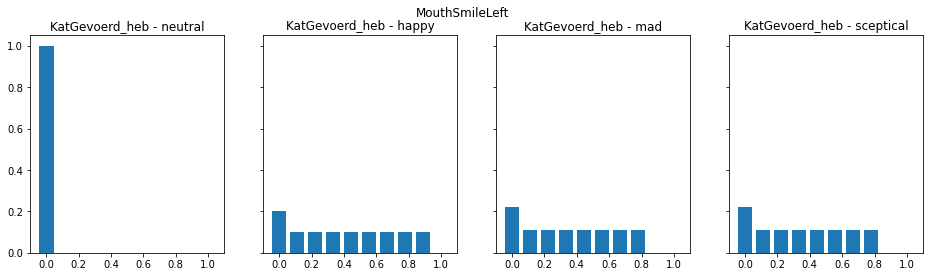

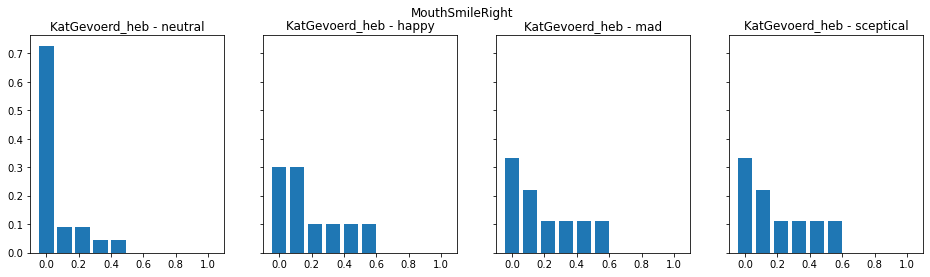

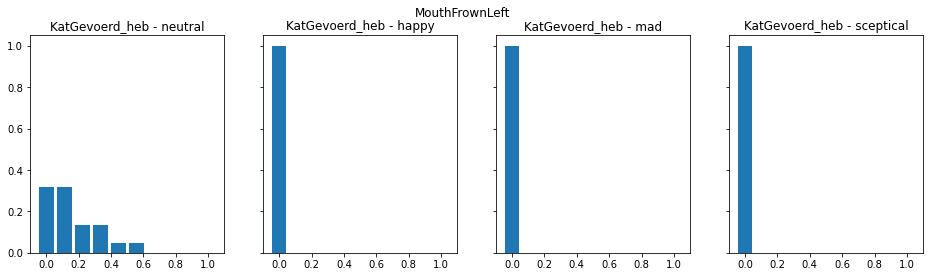

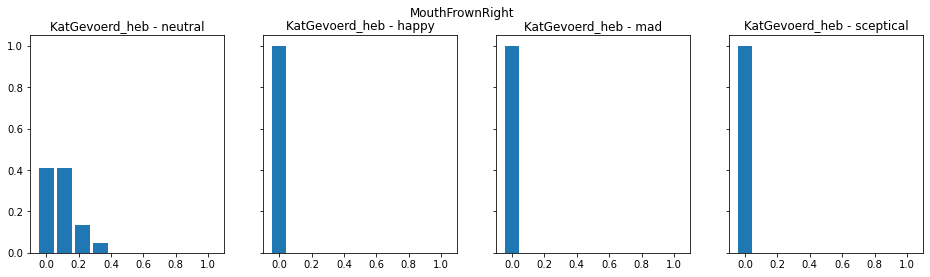

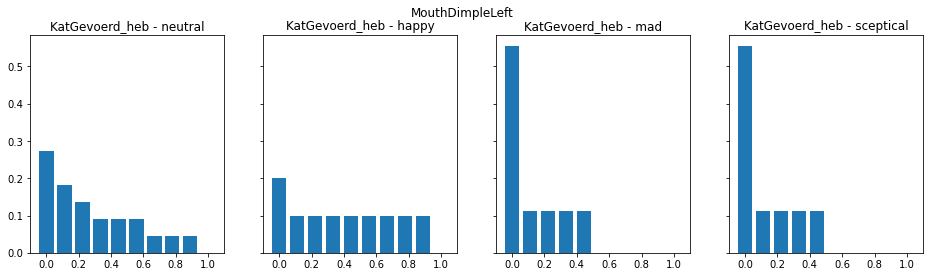

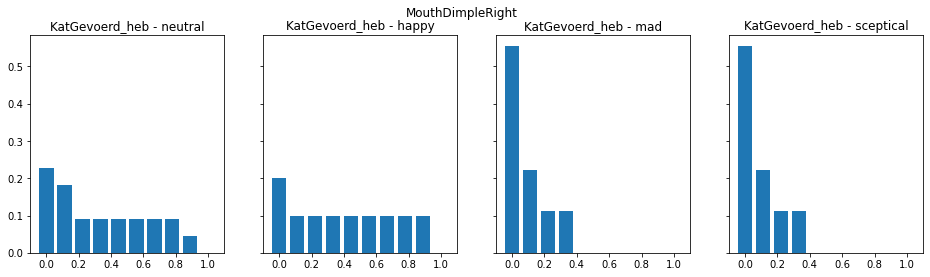

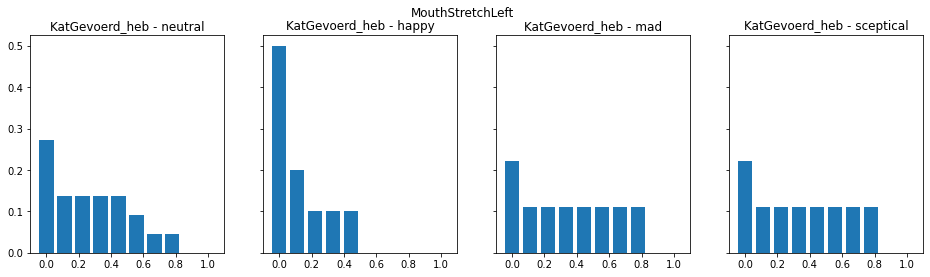

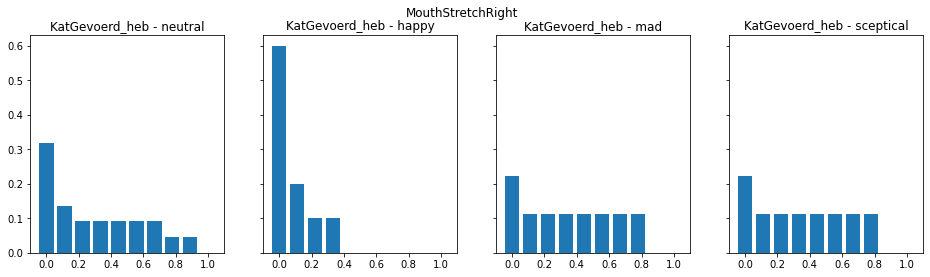

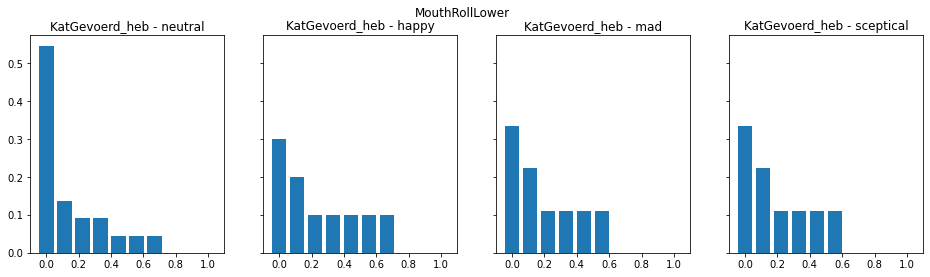

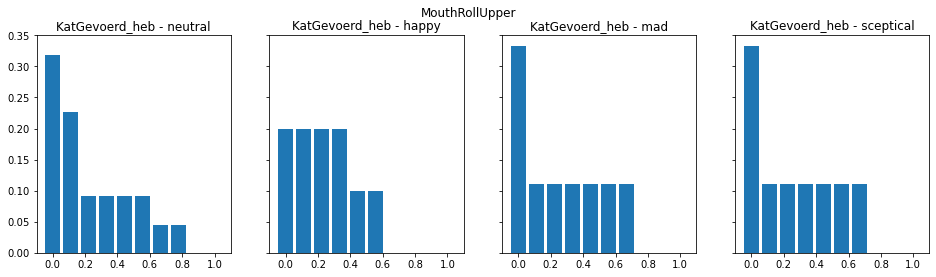

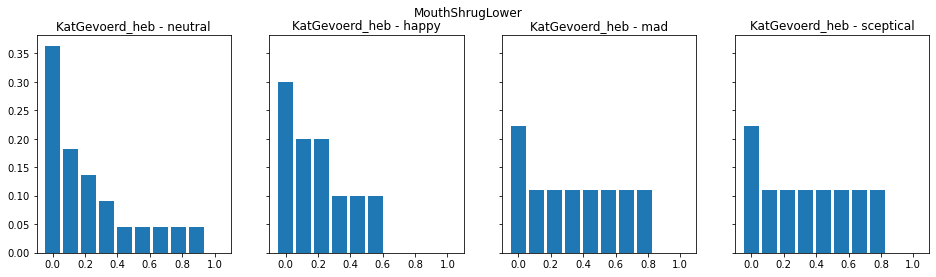

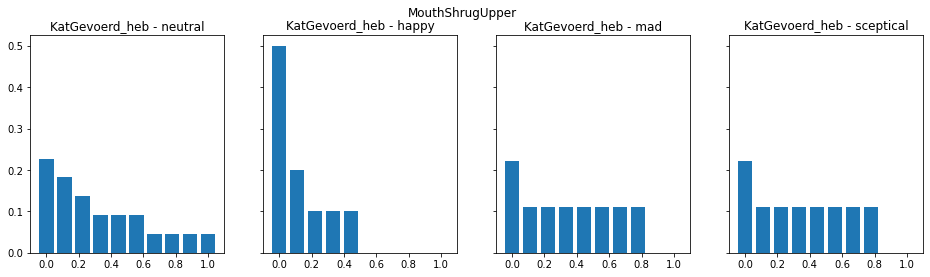

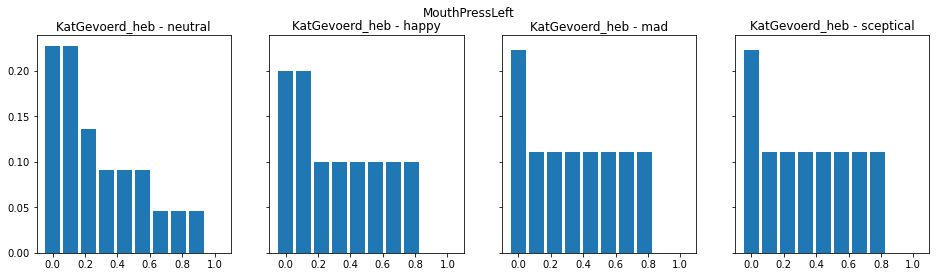

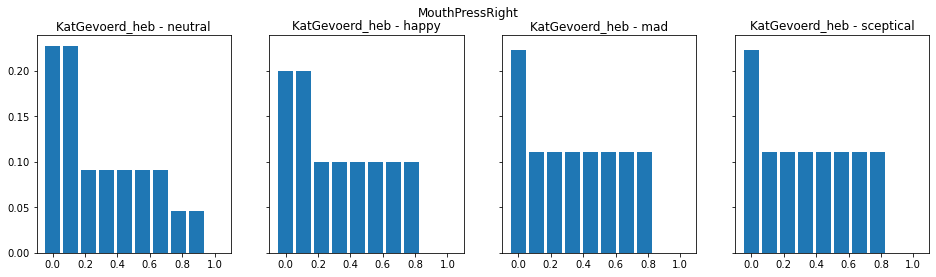

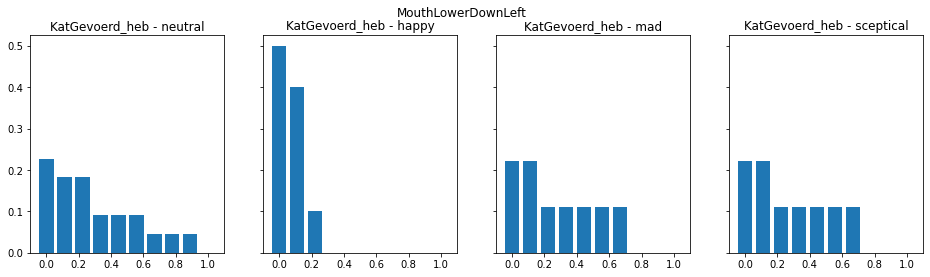

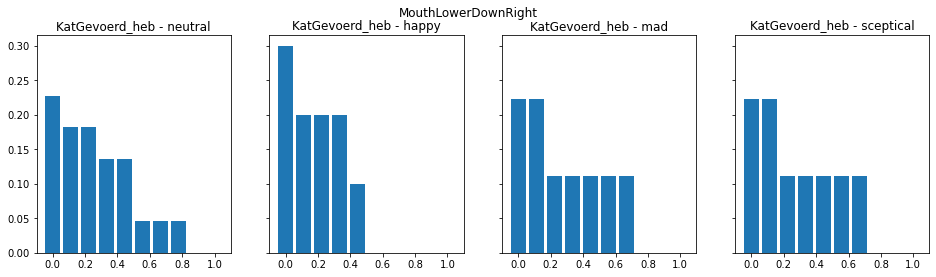

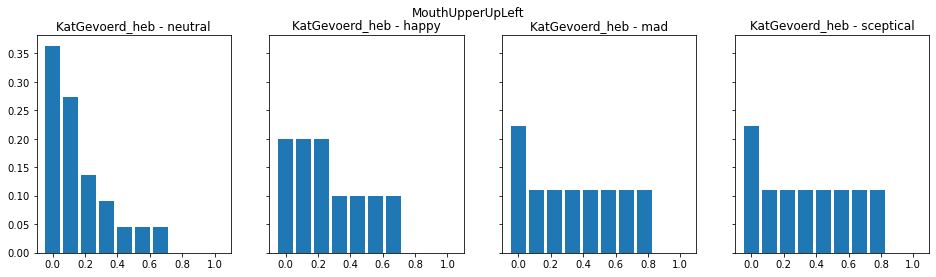

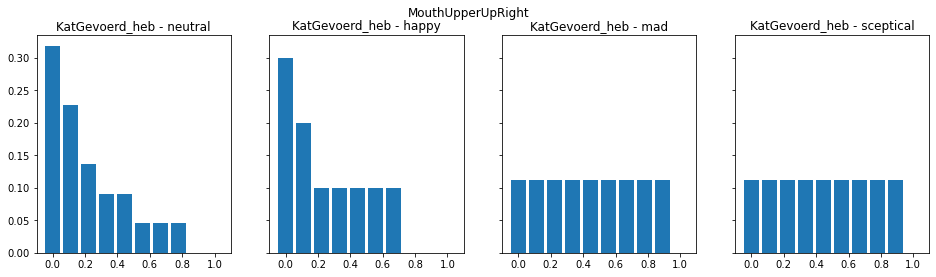

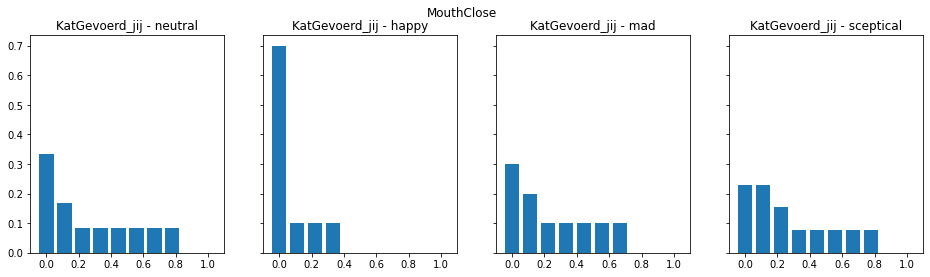

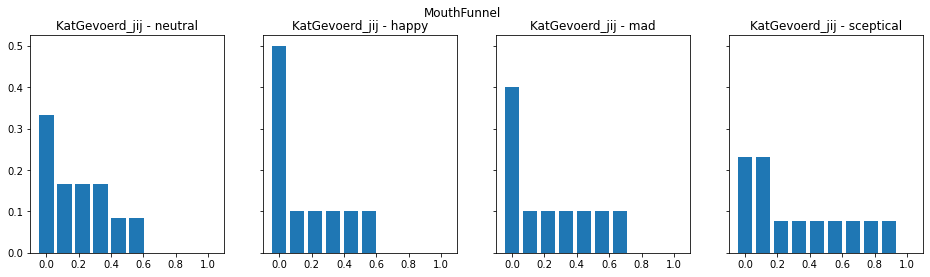

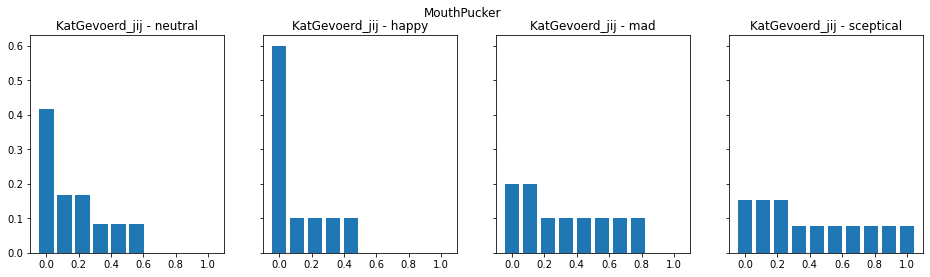

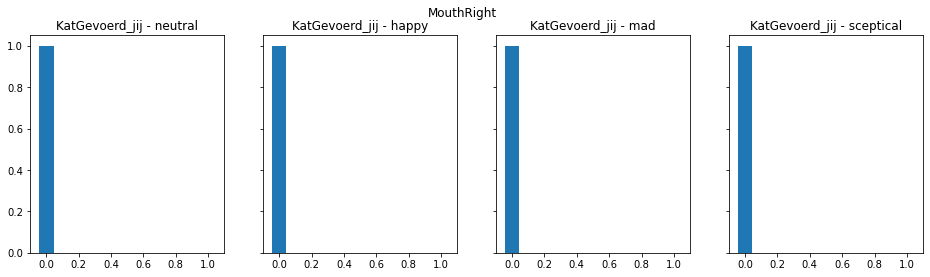

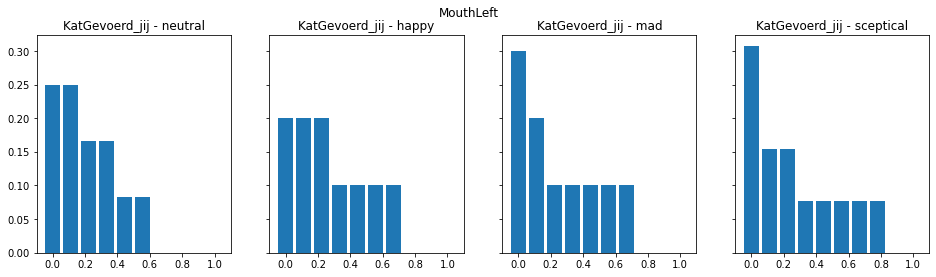

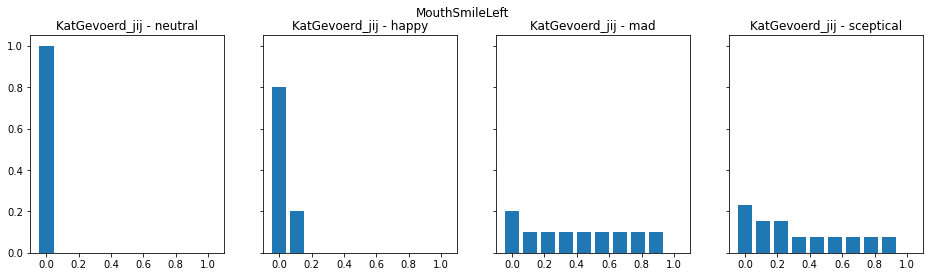

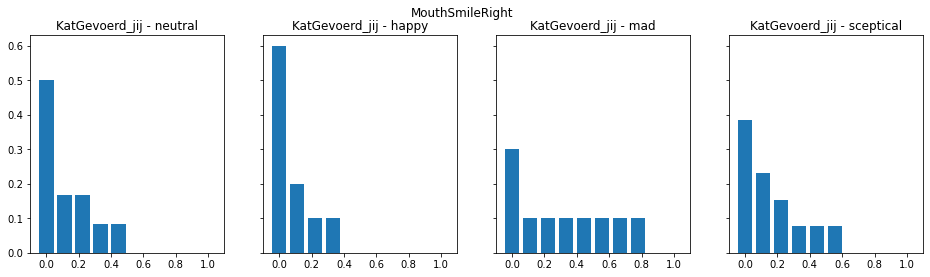

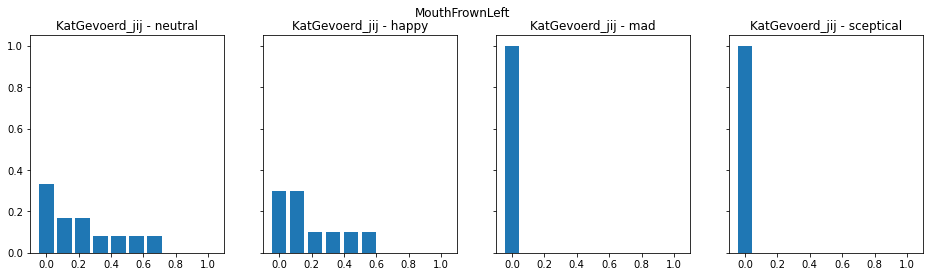

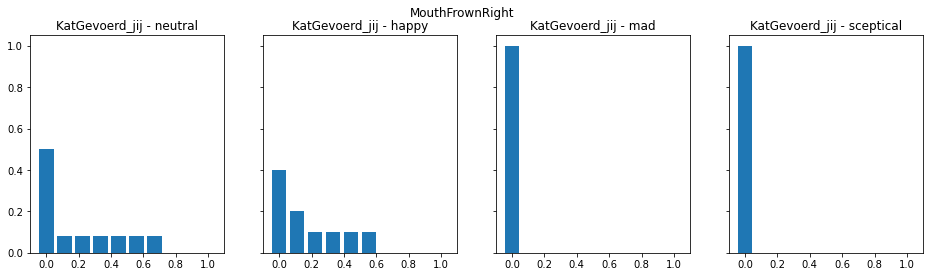

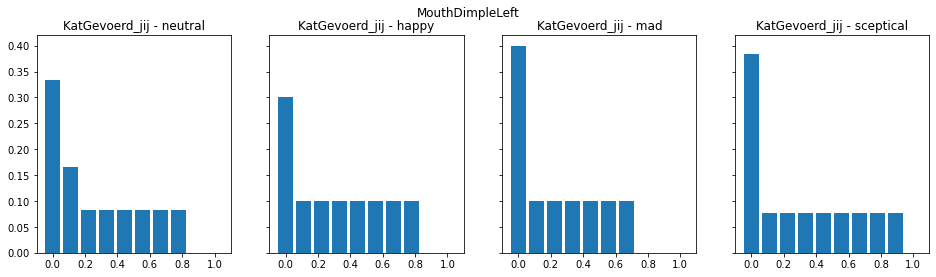

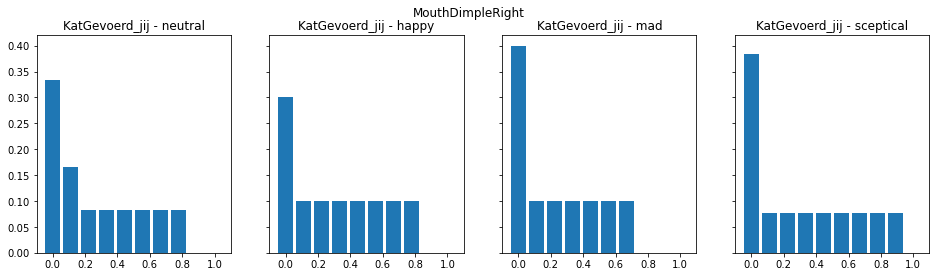

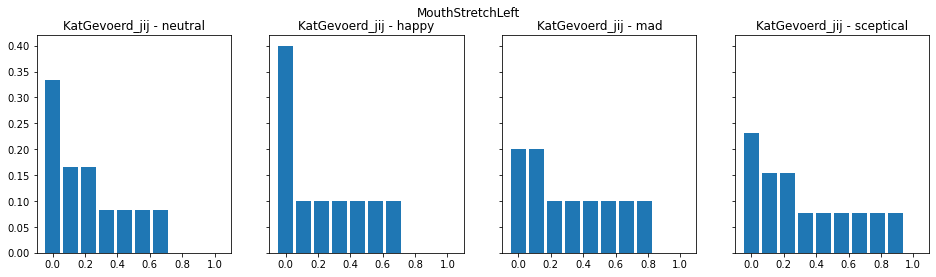

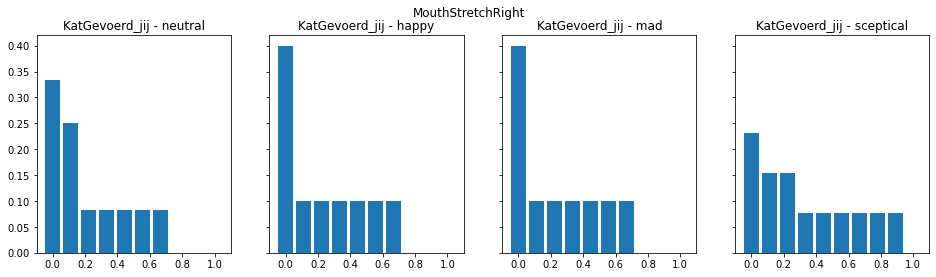

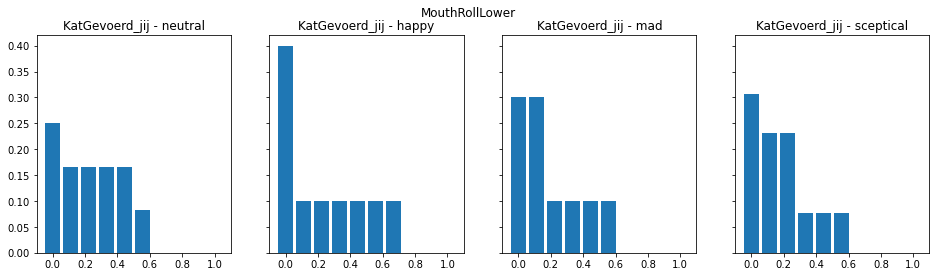

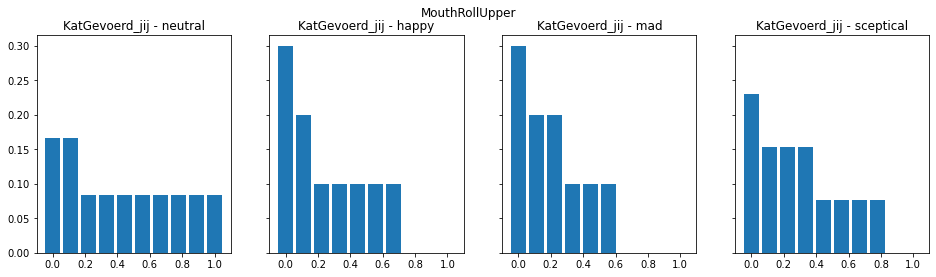

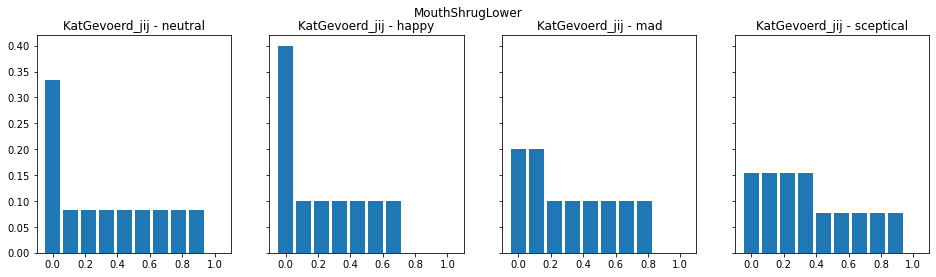

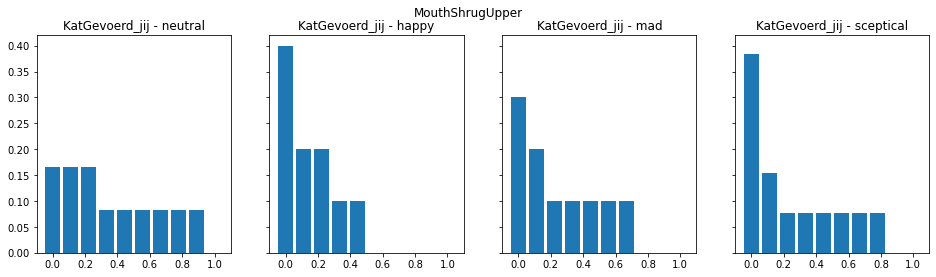

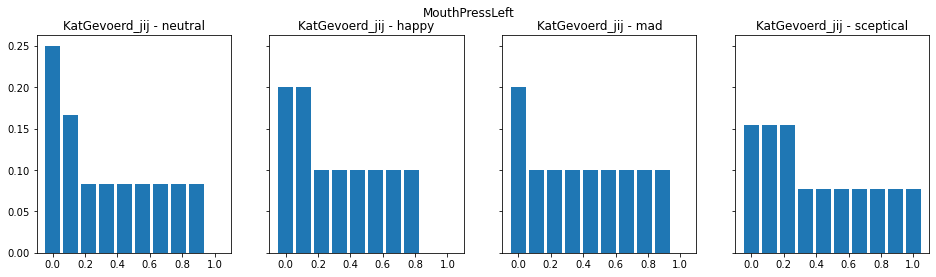

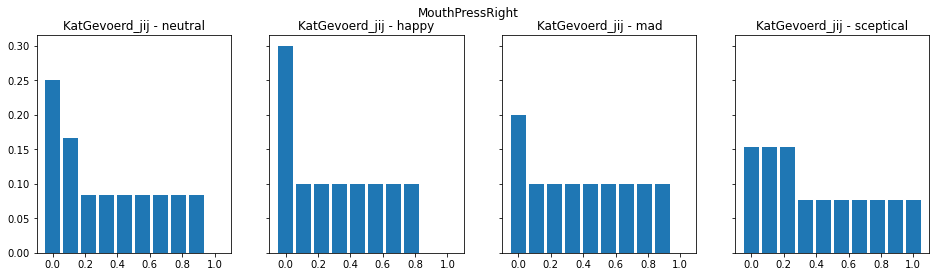

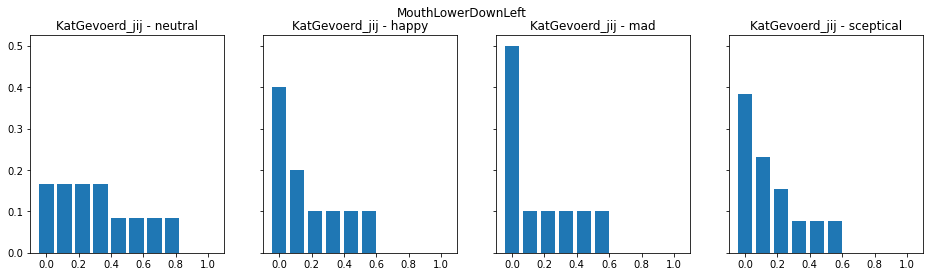

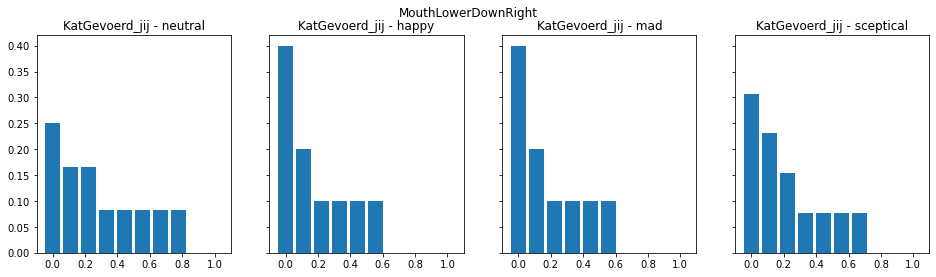

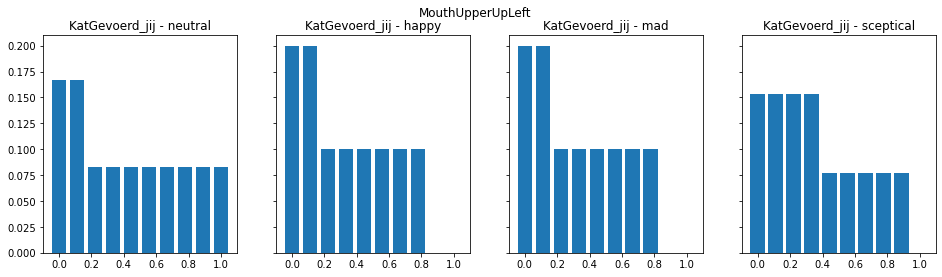

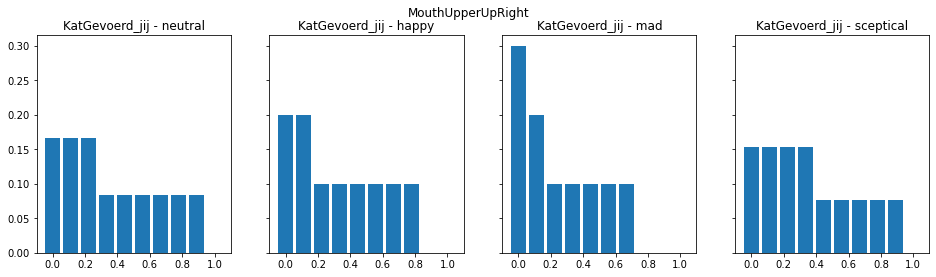

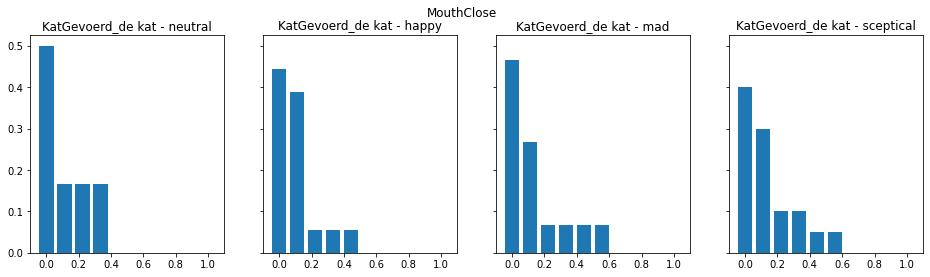

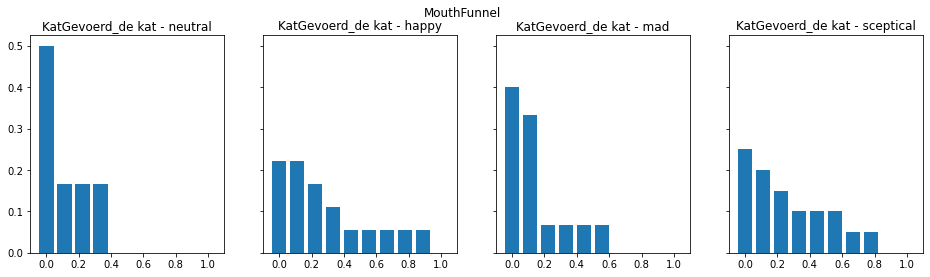

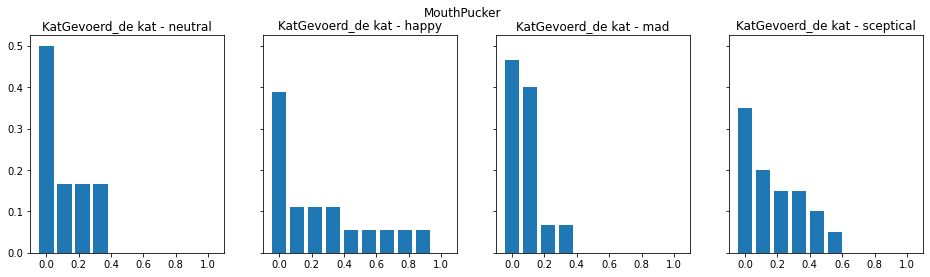

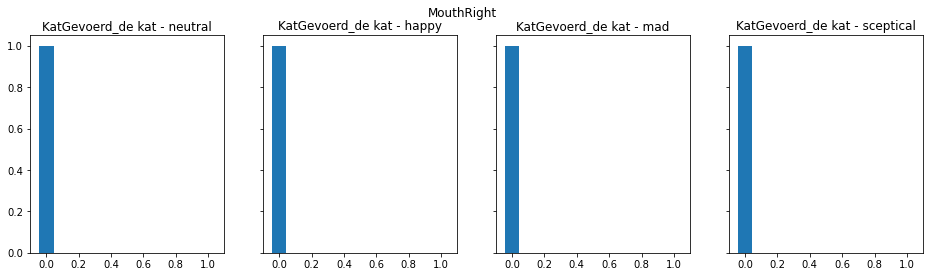

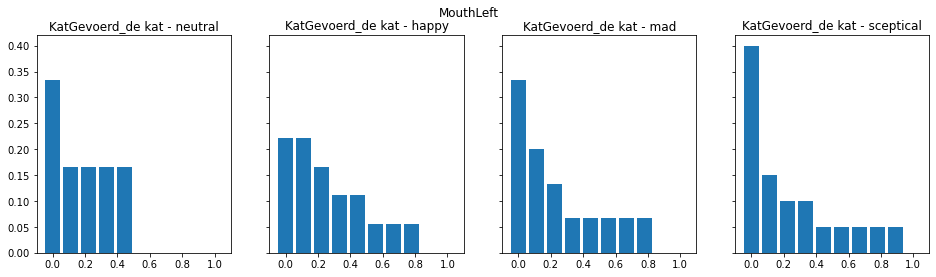

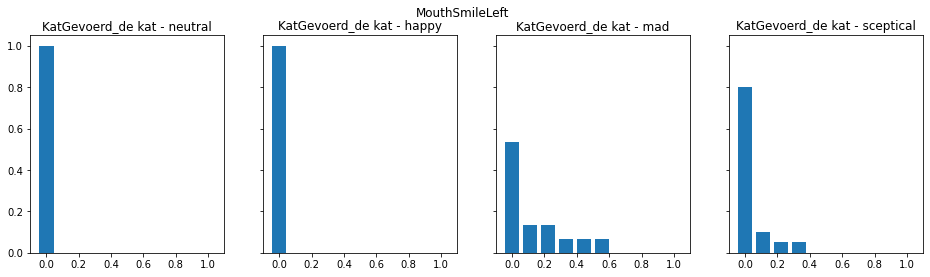

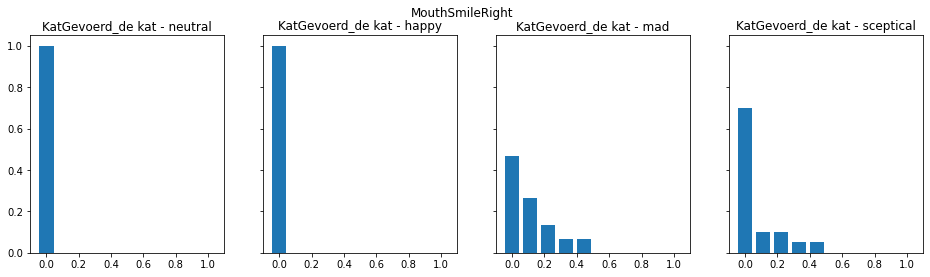

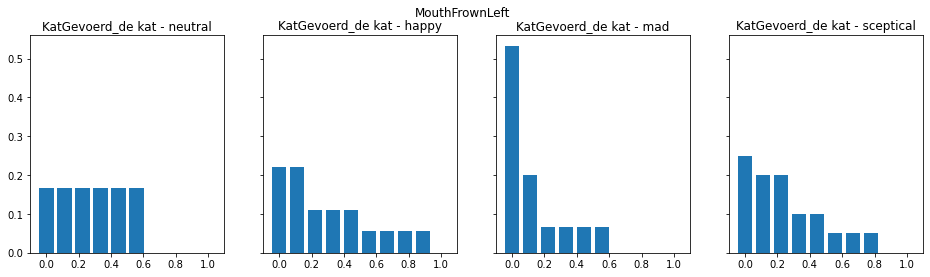

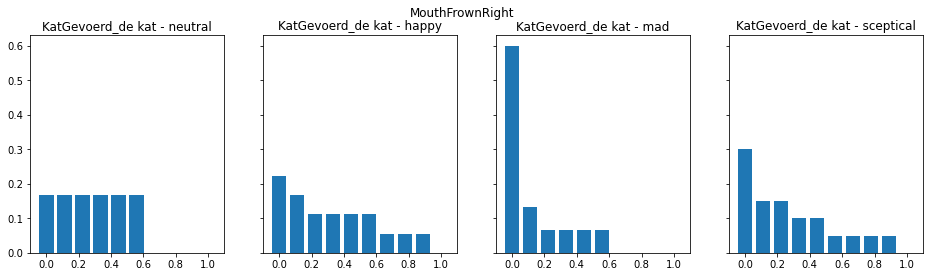

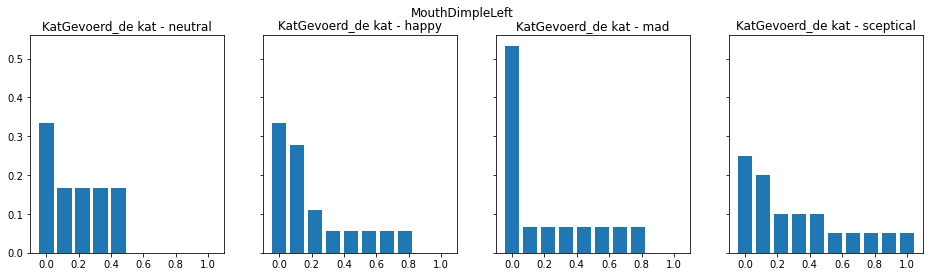

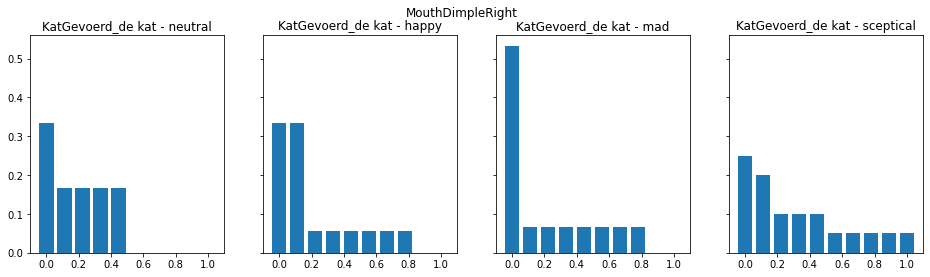

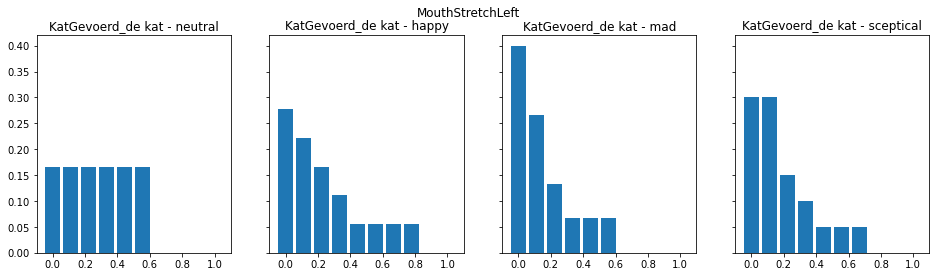

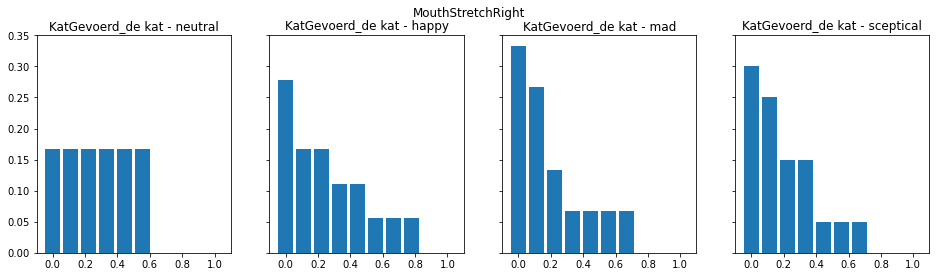

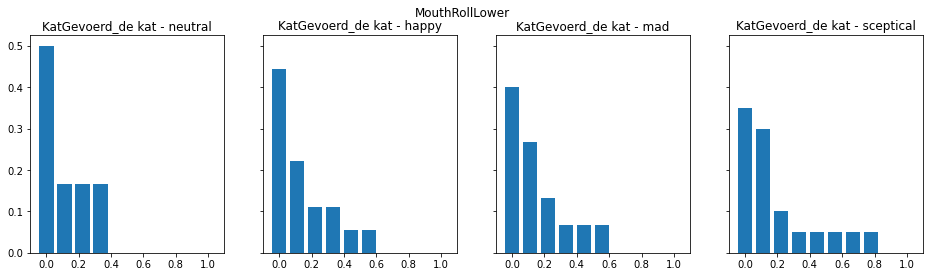

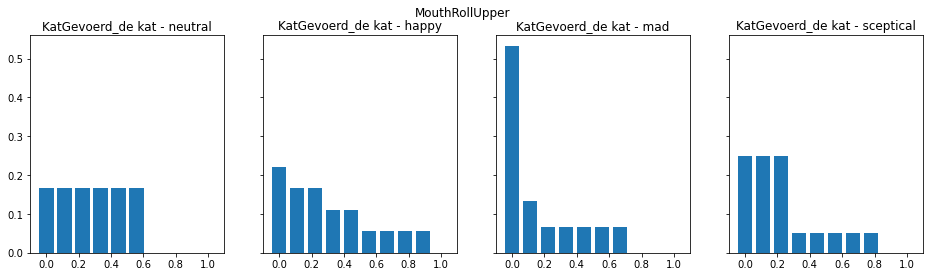

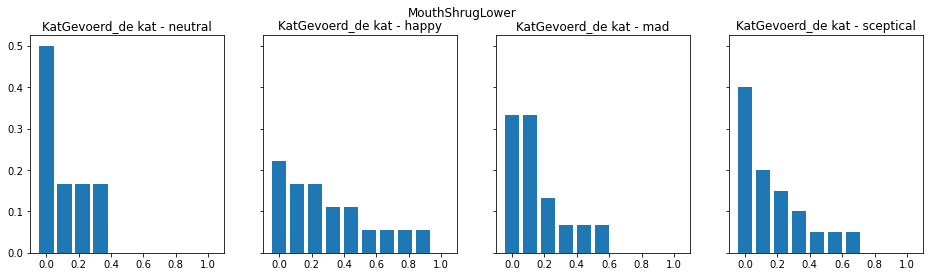

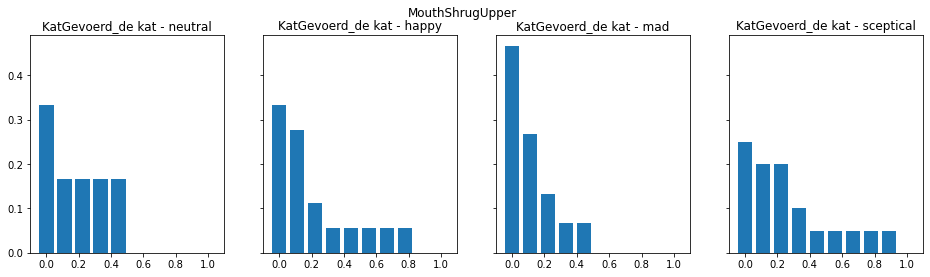

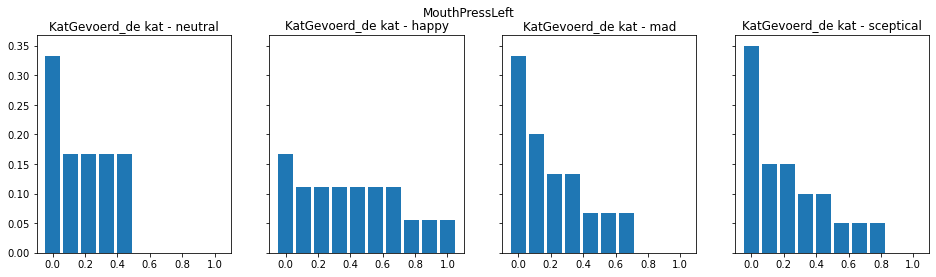

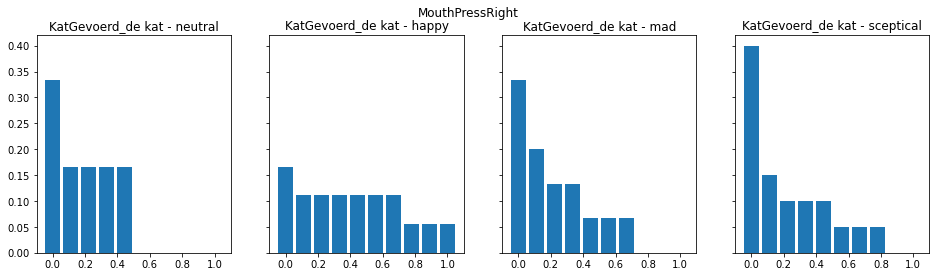

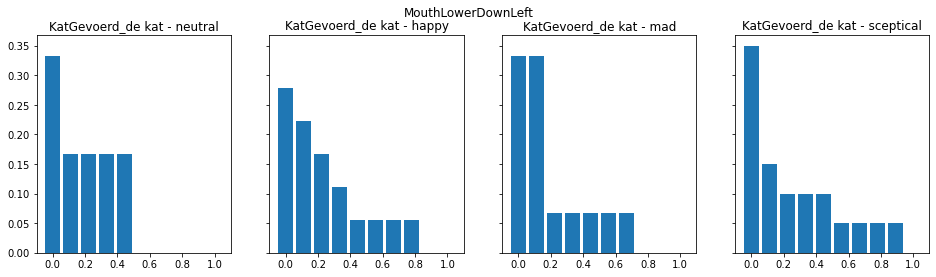

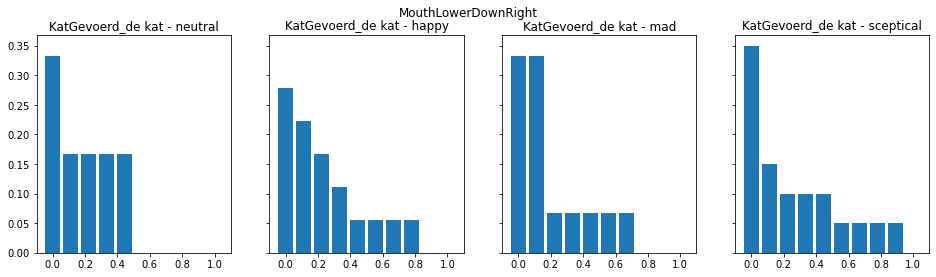

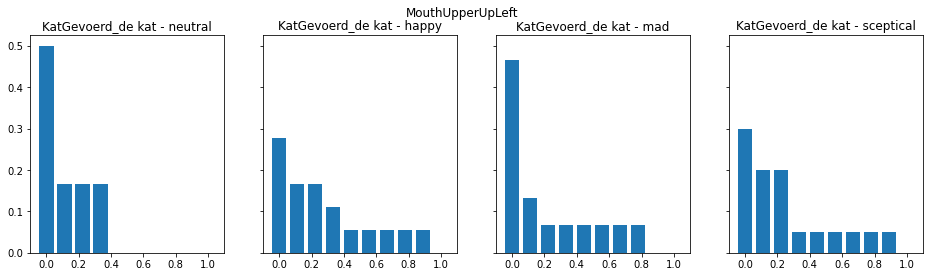

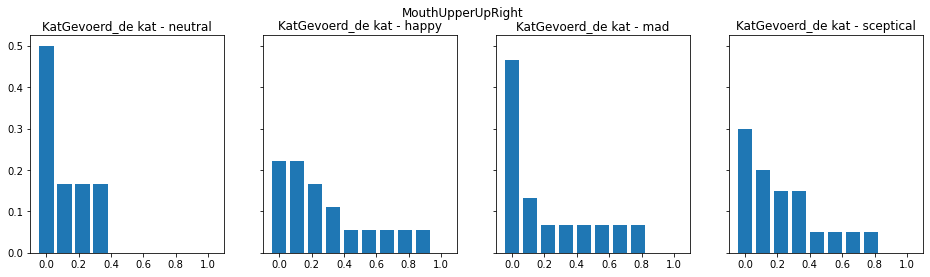

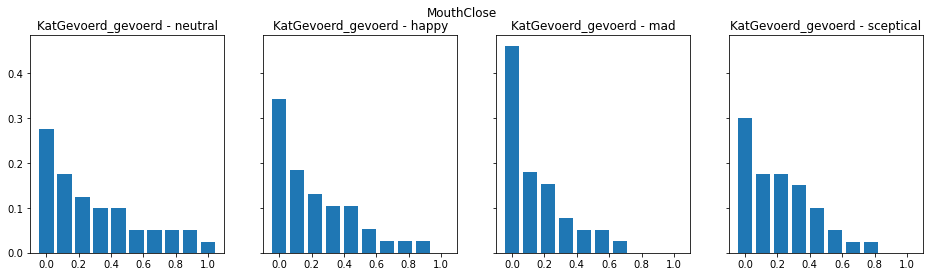

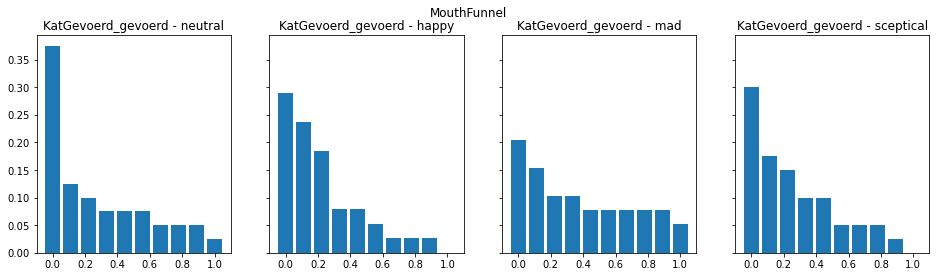

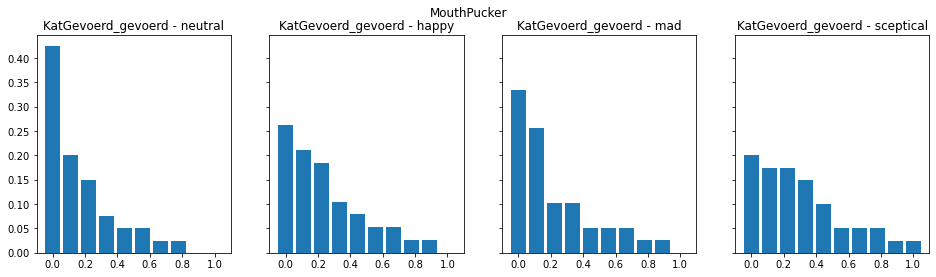

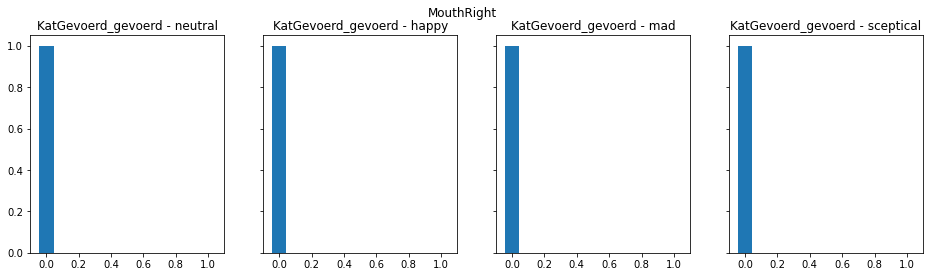

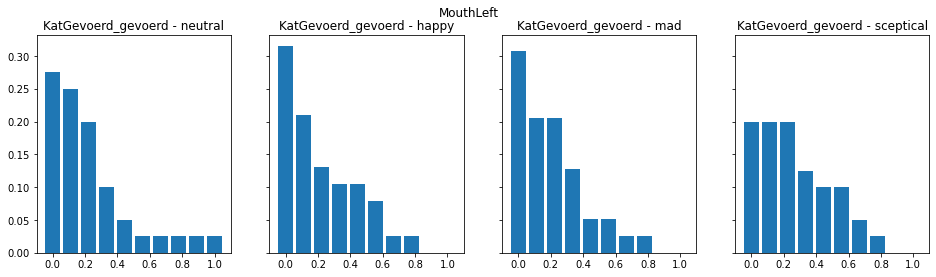

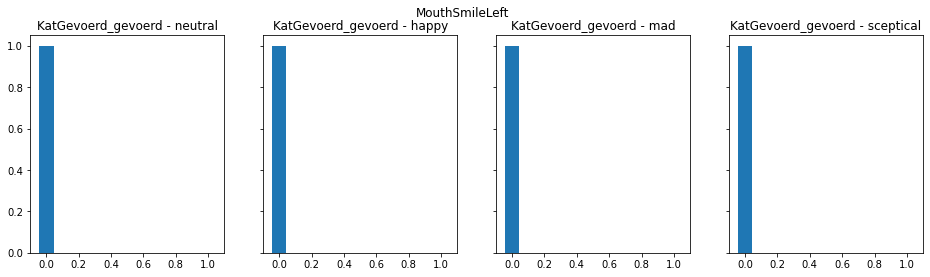

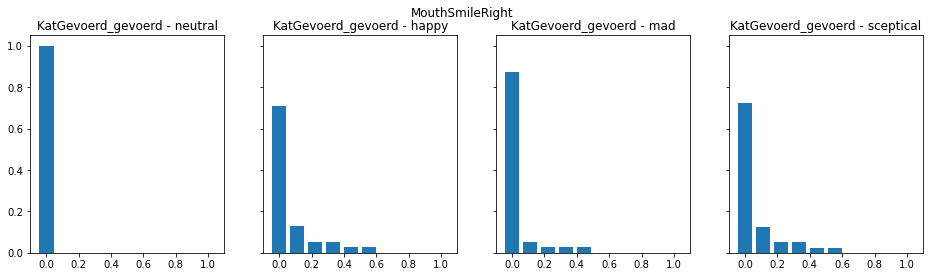

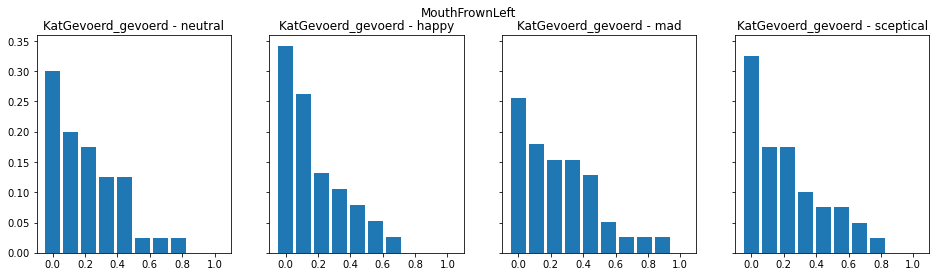

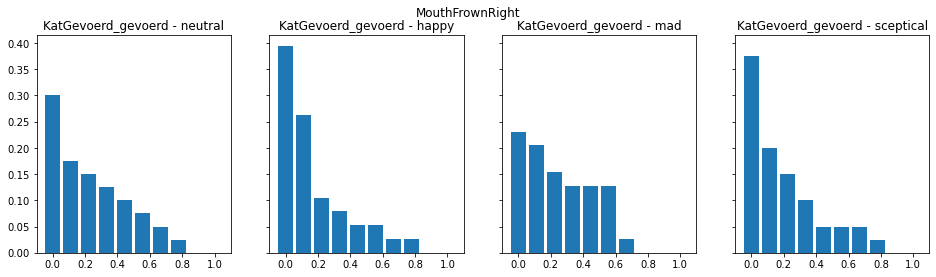

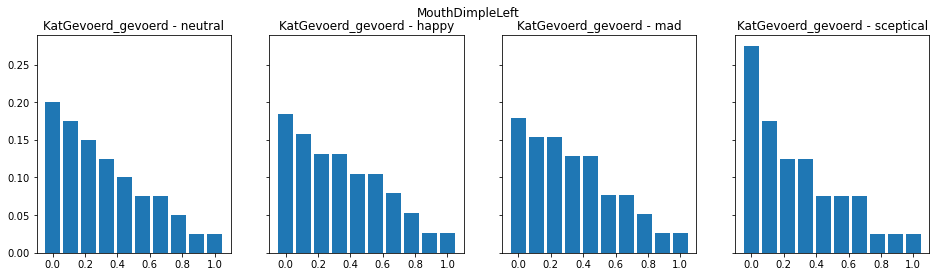

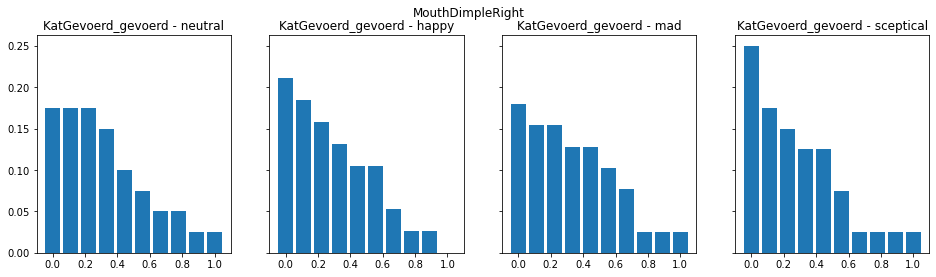

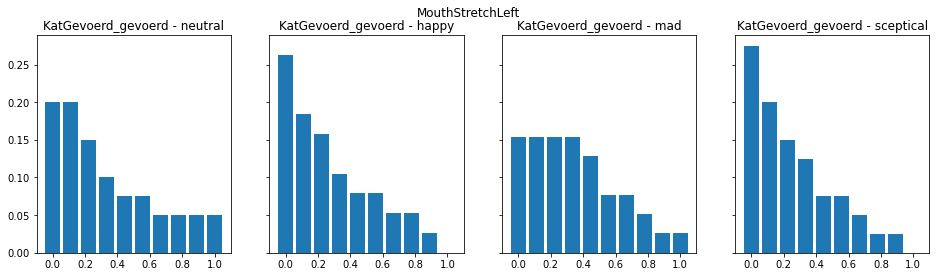

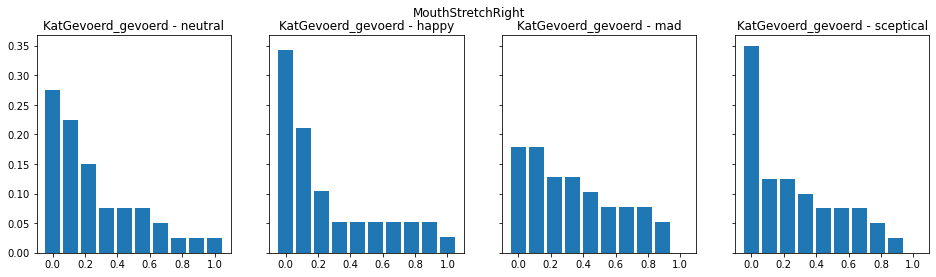

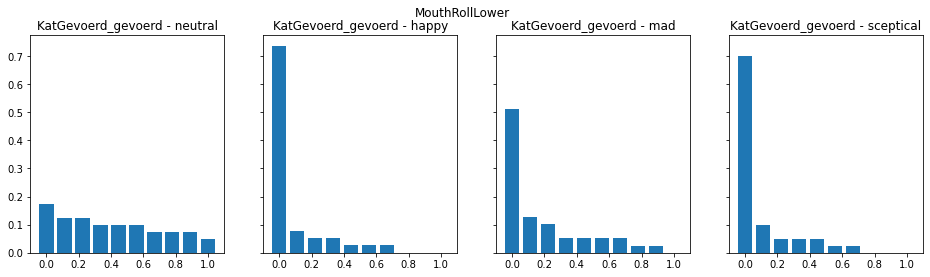

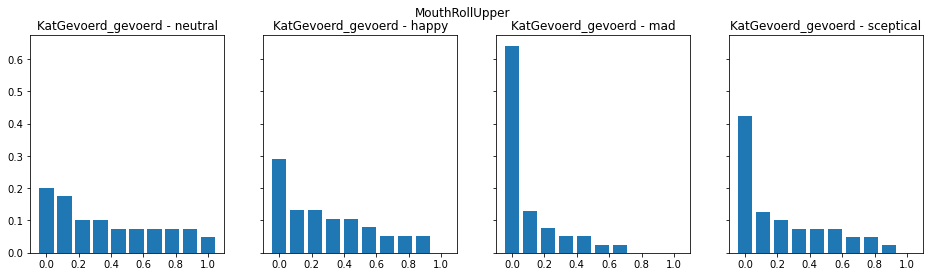

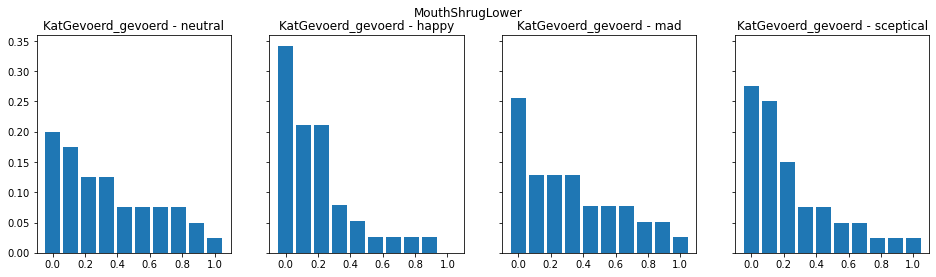

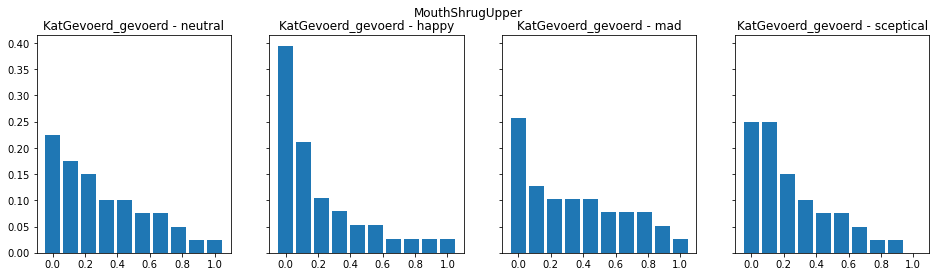

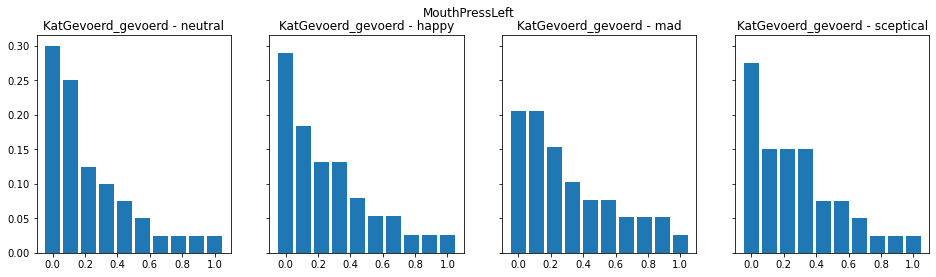

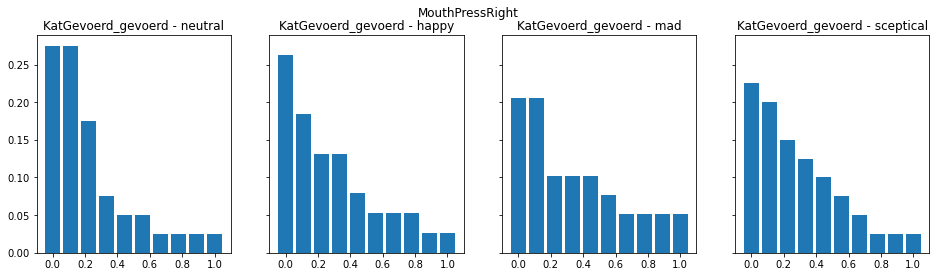

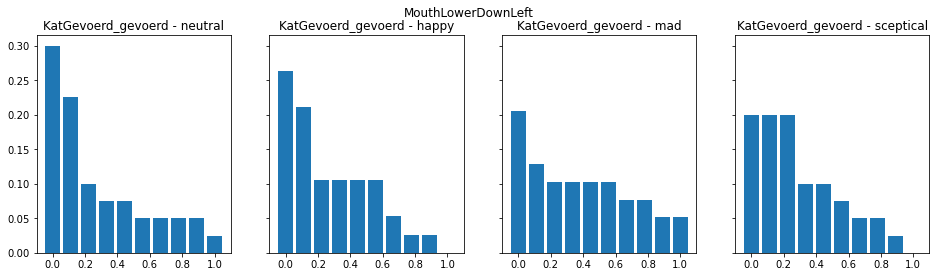

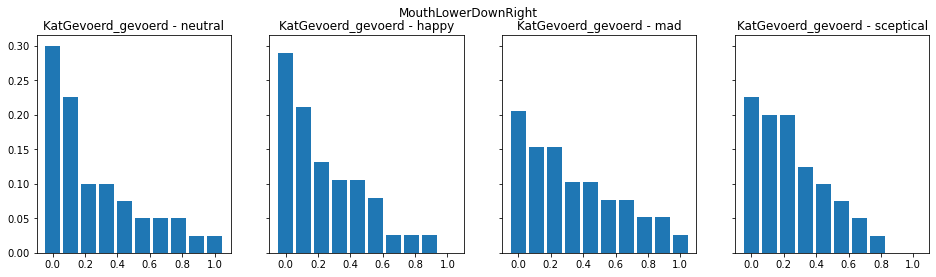

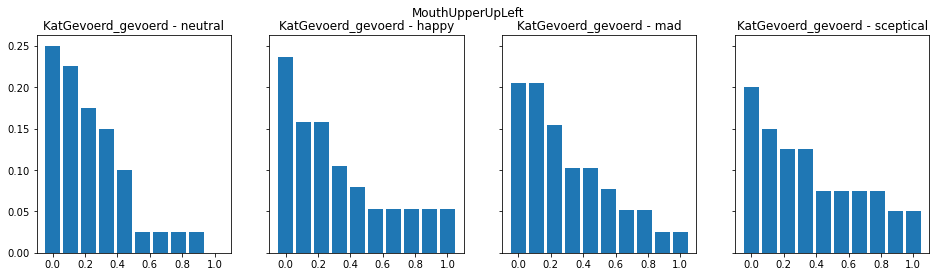

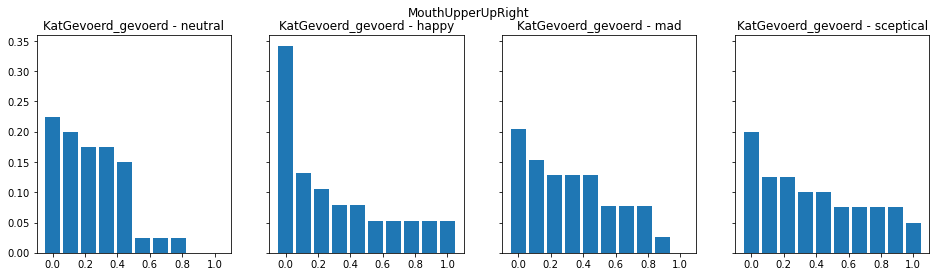

In [47]:
for word in cat_labels:
    for feat in mouth_group:
        fig, axs = plt.subplots(1, len(cat_set), sharey=True, figsize=(16, 4))
        index = 0
    
        for emotion in cat_set.keys():
            bars = cat_set[emotion][word][feat].value_counts(bins=10, normalize=True)
            bins = [f.mid for f in bars.index]
            bins = np.linspace(0, 1, 10)
    
            binwidth = bars.index[0].length * 0.9
            binwidth = 0.09
         
            axs[index].bar(bins, bars, width=binwidth)
            axs[index].set_title('KatGevoerd_' + word + ' - '+ emotion)
        
            index += 1
        
        fig.suptitle(feat)
        plt.show()

In [53]:
frankenstein = pd.concat([cat_set['neutral']['wat'], 
                          cat_set['happy']['heb'], 
                          cat_set['mad']['jij'], 
                          cat_set['sceptical']['de kat'], 
                          cat_set['happy']['gevoerd']])
out = os.path.join('output', 'KatGevoerd_frankenstein.csv')
frankenstein.to_csv(out)

In [48]:
print(cat_set['neutral']['wat'])

            Timecode  BlendShapeCount  EyeBlinkLeft  EyeLookDownLeft  \
105  13:43:35:21.059               61  9.620000e-08         0.000000   
106  13:43:35:22.060               61  8.850000e-08         0.000000   
107  13:43:35:23.062               61  8.150000e-08         0.000000   
108  13:43:35:24.064               61  7.500000e-08         0.000000   
109  13:43:35:25.065               61  6.900000e-08         0.000000   
110  13:43:35:26.067               61  6.350000e-08         0.000000   
111  13:43:35:27.068               61  5.840000e-08         0.022380   
112  13:43:35:28.070               61  5.380000e-08         0.045447   
113  13:43:35:29.071               61  4.950000e-08         0.058873   
114  13:43:35:30.073               61  4.560000e-08         0.068550   
115  13:43:35:31.075               61  4.190000e-08         0.082914   
116  13:43:35:32.076               61  3.860000e-08         0.092639   
117  13:43:35:33.078               61  3.550000e-08         0.10